In [1]:
# dir to csv files
dir = r"C:\Users\Shadow\Documents\sequentialmodel\preprocess"

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
#from torchsummary import summary
from torch.optim import lr_scheduler


# Dataset
from GeoGuessrDataset import GeoGuessrDataset


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tnrange
import time
import copy
import pygeohash as phg


%matplotlib inline

# Enable autoreloading of imported modules.
%load_ext autoreload
%autoreload 2

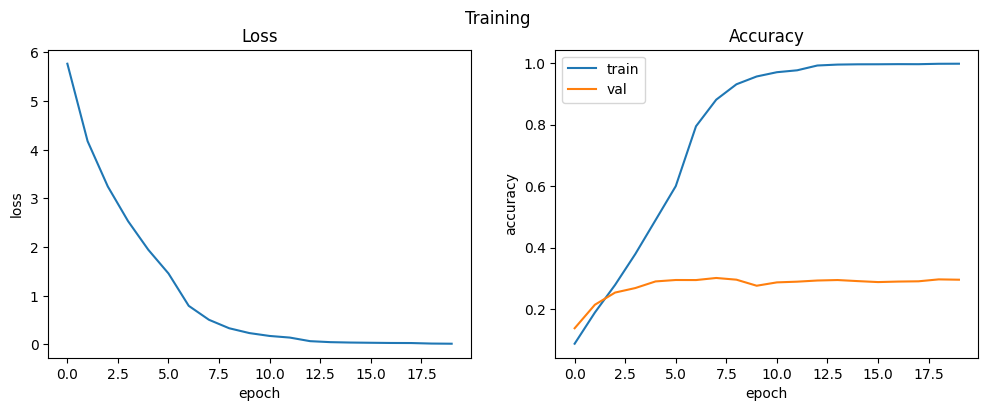

In [3]:
from utils import show_training
checkpoint = torch.load(r"C:\Users\Shadow\Documents\DLCV_Project_GeoGuessr_AI-Basti\models\pretrainedresnet50_20epoch_all_stats.tar")

history = {'loss':checkpoint['train_loss_history'], 'train_acc':checkpoint['train_acc_history'],'val_acc':checkpoint['val_acc_history']}

show_training(history)

In [16]:
check = torch.load(r"C:\Users\Shadow\Documents\DLCV_Project_GeoGuessr_AI-Basti\models\pretrainedresnet50_20epoch_all_stats.tar")
checkpoint1 = torch.load(r"C:\Users\Shadow\Documents\DLCV_Project_GeoGuessr_AI-Basti\models\pretrainedresnet50_14epoch_contiheadstats.tar")

hist = []
top_acc = []
for i in ['Europe','North_America','Asia','South_America','Africa','Oceania']:
    checkpoint = torch.load(r"C:\Users\Shadow\Documents\DLCV_Project_GeoGuessr_AI-Basti\models\pretrainedresnet50_14epoch_"+i+"_stats.tar")
    hist.append(checkpoint)
    top_acc.append(max(checkpoint['val_acc_history']))
print(top_acc)

[tensor(0.2599, device='cuda:0', dtype=torch.float64), tensor(0.2800, device='cuda:0', dtype=torch.float64), tensor(0.3437, device='cuda:0', dtype=torch.float64), tensor(0.3155, device='cuda:0', dtype=torch.float64), tensor(0.5109, device='cuda:0', dtype=torch.float64), tensor(0.4301, device='cuda:0', dtype=torch.float64)]


In [ ]:
df = pd.read_csv(dir+r"\all_new_continents_merged.csv", delimiter=',', skiprows=0, low_memory=False)
weights = df['continent'].value_counts().values / (df['continent'].count())
print(weights)
print(df['continent'].value_counts())

In [6]:
print(torch.tensor(checkpoint1['val_acc_history'],device='cpu'))

tensor([0.8526, 0.8741, 0.8983, 0.8982, 0.8902, 0.8924, 0.8960, 0.8969, 0.8903,
        0.8850, 0.8866, 0.9027, 0.9007, 0.8986, 0.8994, 0.9084, 0.9055, 0.9130,
        0.9103, 0.9080], dtype=torch.float64)


In [7]:
val = torch.zeros(10, dtype=torch.float64)
train = torch.zeros(10, dtype=torch.float64)
for i in range(6):
    
    train += torch.tensor(hist[i]['train_acc_history'],device='cpu')[0:10]*weights[i]
    val += torch.tensor(hist[i]['val_acc_history'],device='cpu')[0:10]*weights[i]
val = val * torch.tensor(checkpoint1['val_acc_history'],device='cpu')[0:10]
train = train * torch.tensor(checkpoint1['train_acc_history'],device='cpu')[0:10]

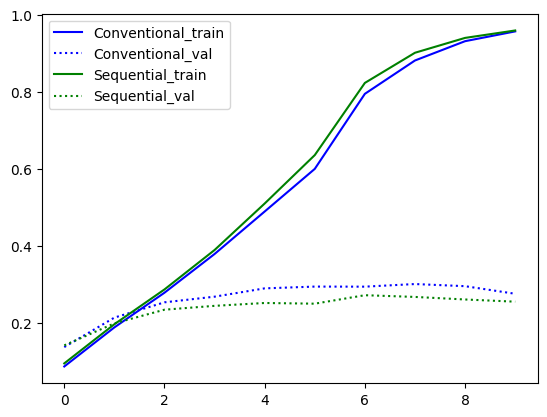

In [8]:
import matplotlib.pyplot as plt
import torch

plt.plot(torch.tensor(check['train_acc_history'], device = 'cpu')[0:10], label='Conventional_train', color='blue', linestyle='solid')
plt.plot(torch.tensor(check['val_acc_history'], device = 'cpu')[0:10], label='Conventional_val', color='blue', linestyle='dotted')
plt.plot(train, label='Sequential_train', color='green', linestyle='solid')
plt.plot(val, label='Sequential_val', color='green', linestyle='dotted')
plt.legend()
plt.show()